# ENSO Longitude Index (ELI)

Williams, I. N., & Patricola, C. M. (2018). Diversity of ENSO events unified by convective threshold sea surface temperature: A nonlinear ENSO index. Geophysical Research Letters, 45, 9236–9244. https://doi.org/10.1029/2018GL079203

In [1]:
import numpy as np
import xarray as xr
import pandas as pd

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# For the IRI DL 'months since' unit
def decode_cf(ds, time_var):
    if ds[time_var].attrs['calendar'] == '360':
        ds[time_var].attrs['calendar'] = '360_day'
    ds = xr.decode_cf(ds, decode_times=True)
    return ds

# Nino 3.4

In [3]:
url = 'https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/T/%28Jan%201980%29/last/RANGE/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/zlev/removeGRID/dods'
ds = xr.open_dataset(url, decode_times=False)
ds = decode_cf(ds, 'T')
N34a = (ds.sst.groupby('T.month') - ds.sst.groupby('T.month').mean('T'))

# ELI

In [45]:
url = 'https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/T/(Jan%201980)/last/RANGE/zlev/removeGRID/Y/-5/5/RANGE/dods'
ds = xr.open_dataset(url, decode_times=False)
ds = decode_cf(ds, 'T')
threshold = ds.sst.mean(['X', 'Y'])
# this is a choice for Pacific basin
wrk = (ds.sst > threshold).sel(X=slice(104, 290))
eli = xr.where(wrk, wrk.X, np.nan).mean(['X', 'Y'])
print(eli[-1].values)

178.12254


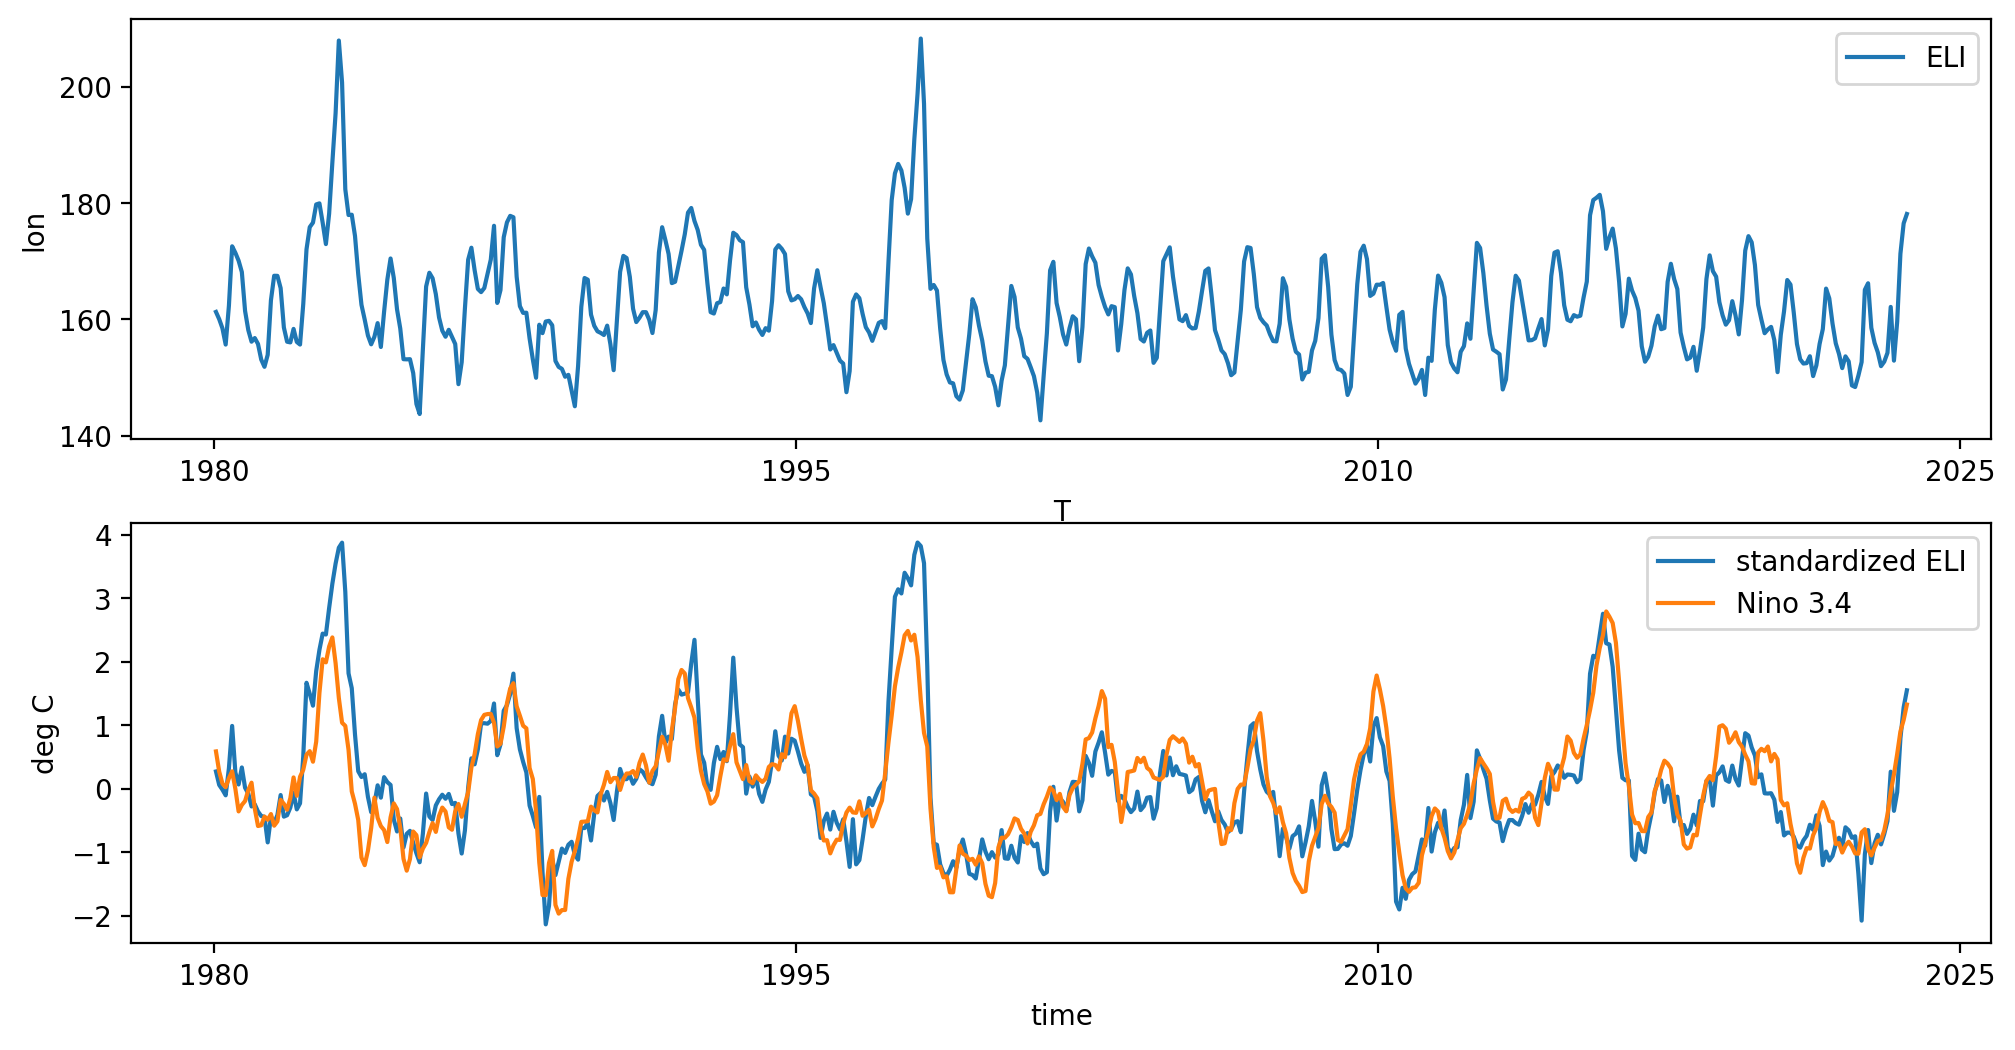

In [46]:
fig, axs = plt.subplots(2, 1, figsize=(12, 6))
ax = axs[0]
eli.plot(ax=ax, label='ELI')
ax.set_ylabel('lon')
ax.legend()

ax = axs[1]
eli = eli.groupby('T.month') - eli.groupby('T.month').mean('T')
eli = eli.groupby('T.month') / eli.groupby('T.month').std('T')
eli.plot(ax=ax, label='standardized ELI')
N34a.plot(ax=ax, label='Nino 3.4')
ax.set_ylabel('deg C')
ax.legend()
plt.show()